In [ ]:
# Machine Learning

# Name: Reema Aldanish

#------------------#
# Forecasting Closing Prices of Saudi Stocks on Tadawul

<b><font size="4" color='#ADA96E'>
Dataset Link:</font></b>

https://www.kaggle.com/datasets/salwaalzahrani/saudi-stock-exchange-tadawul


<b><font size="6" color='#5097A4'>1. Preparing Data for machine learning algorithm</font></b>

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_classification
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
df = pd.read_csv("/content/Tadawul_stcks.csv")

In [ ]:
print(df.shape)

(593819, 14)


In [ ]:
df.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   symbol          593819 non-null  int64  
 1   name            593819 non-null  object 
 2   trading_name    593819 non-null  object 
 3   sectoer         593819 non-null  object 
 4   date            593819 non-null  object 
 5   open            587364 non-null  float64
 6   high            587122 non-null  float64
 7   low             587122 non-null  float64
 8   close           593819 non-null  float64
 9   change          593819 non-null  float64
 10  perc_Change     593819 non-null  float64
 11  volume_traded   593819 non-null  float64
 12  value_traded    593819 non-null  float64
 13  no_trades       586128 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 63.4+ MB


In [ ]:
df.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,593819.000000,587364.000000,587122.000000,587122.000000,593819.000000,593819.000000,593819.000000,5.938190e+05,5.938190e+05,586128.000000
mean,3952.684793,41.237794,41.971636,40.593406,40.961602,0.001174,0.035652,1.673422e+06,5.008553e+07,960.642348
std,2284.498530,86.713646,89.178183,84.562283,86.491709,4.782545,3.480783,5.482121e+06,1.472969e+08,3401.794136
min,1010.000000,1.950000,1.950000,1.950000,0.000000,-681.200000,-100.000000,0.000000e+00,0.000000e+00,0.000000
25%,2140.000000,16.200000,16.400000,16.000000,16.070000,-0.250000,-0.910000,1.484920e+05,4.114858e+06,158.000000
50%,4004.000000,26.500000,26.905000,26.100000,26.300000,0.000000,0.000000,4.335560e+05,1.210533e+07,376.000000
75%,5110.000000,46.500000,47.200000,45.850000,46.200000,0.250000,0.910000,1.271184e+06,3.561017e+07,900.000000
max,8312.000000,6709.150000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,7.976659e+08,1.586582e+10,816526.000000


Basic statistics for numerical features

In [ ]:
sectoer_values = df['sectoer'].value_counts()
sectoer_values

sectoer
Financials                154259
Materials                 142283
Consumer Staples           66008
Industrials                64733
Consumer Discretionary     55688
Real Estate                44663
Communication Services     22170
Health Care                17855
Energy                     15803
Utilities                   9386
Information Technology       971
Name: count, dtype: int64

Calculate the frequency distribution for categorical features

<b><font size="5:" color='#5097A4'>a. Handling Missing Values:</font></b>

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Percentage of missing values per column:\n", missing_percentage)
num_cols = df.select_dtypes(include=[np.number]).columns
imr = SimpleImputer(strategy='mean')
imputed_data = imr.fit_transform(df[num_cols])
imputed_dataset = pd.DataFrame(imputed_data, columns=num_cols)
print("\nThe missing values in imputed dataset:")
print(imputed_dataset.isnull().sum())

Percentage of missing values per column:
 symbol            0.000000
name              0.000000
trading_name      0.000000
sectoer           0.000000
date              0.000000
open              1.087032
high              1.127785
low               1.127785
close             0.000000
change            0.000000
perc_Change       0.000000
volume_traded     0.000000
value_traded      0.000000
no_trades         1.295176
dtype: float64

The missing values in imputed dataset:
symbol            0
open              0
high              0
low               0
close             0
change            0
perc_Change       0
volume_traded     0
value_traded      0
no_trades         0
dtype: int64


To address missing values in the data, SimpleImputer from sklearn was used to fill these gaps with the mean in numerical columns. These columns were identified, imputation applied, and the modified data was then converted back into a new DataFrame, resulting in a dataset without missing values.

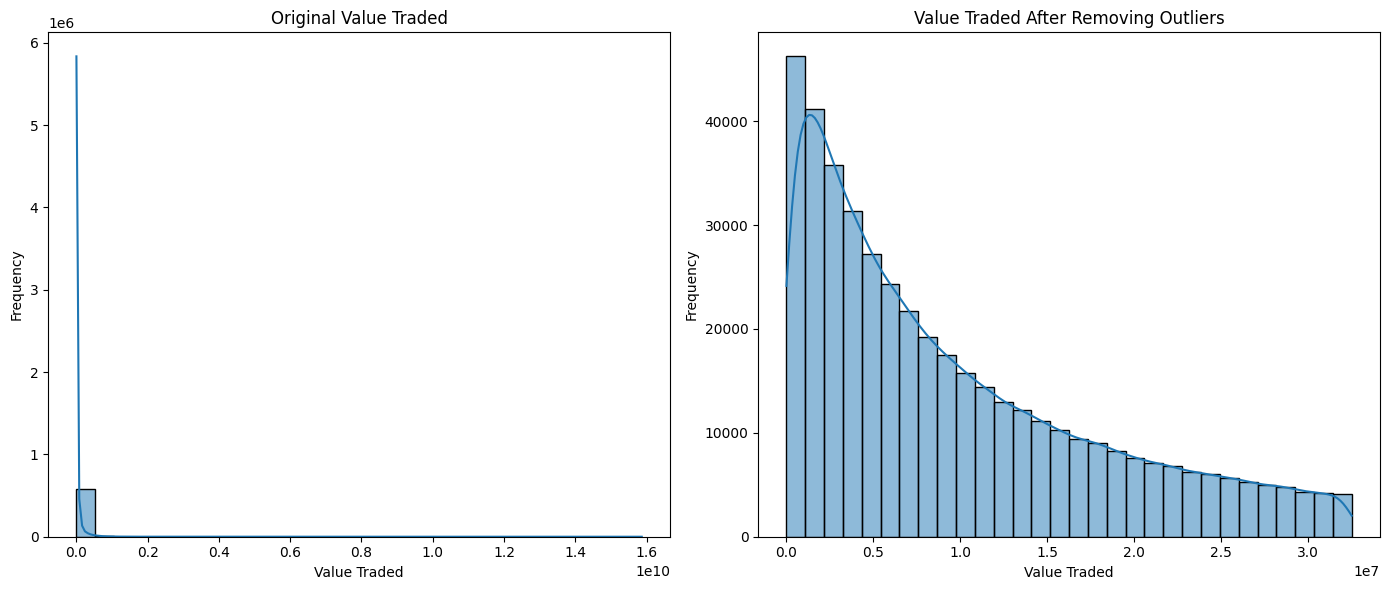

In [ ]:
Q1 = df['value_traded'].quantile(0.22)
Q3 = df['value_traded'].quantile(0.60)
IQR = Q3 - Q1
outlier_lower = Q1 - 1 * IQR
outlier_upper = Q3 + 1 * IQR
data_filtered = df[(df['value_traded'] >= outlier_lower) & (df['value_traded'] <= outlier_upper)]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['value_traded'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Original Value Traded')
axes[0].set_xlabel('Value Traded')
axes[0].set_ylabel('Frequency')
sns.histplot(data_filtered['value_traded'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Value Traded After Removing Outliers')
axes[1].set_xlabel('Value Traded')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

<b><font size="5:" color='#5097A4'>b. Encoding Categorical Variables:</font></b>

In [ ]:
print(df.dtypes)

symbol              int64
name               object
trading_name       object
sectoer            object
date               object
open              float64
high              float64
low               float64
close             float64
change            float64
perc_Change       float64
volume_traded     float64
value_traded      float64
no_trades         float64
dtype: object


In [ ]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)
    df[column] = label_encoder.fit_transform(df[column])
print(df.head())

   symbol  name  trading_name   sectoer  date   open   high    low  close  \
0    2030   133            144        3  4758  35.55  35.85  34.90  34.90   
1    2030   133            144        3  4757  34.70  35.65  34.50  35.30   
2    2030   133            144        3  4756  34.70  35.15  34.70  35.05   
3    2030   133            144        3  4755  35.20  35.65  34.00  34.00   
4    2030   133            144        3  4754  35.35  35.60  34.25  34.55   

   change  perc_Change  volume_traded   value_traded  no_trades   
0   -0.40        -1.13        436609.0   15399073.50       804.0  
1    0.25         0.71        737624.0   25981391.35      1268.0  
2    1.05         3.09        489831.0   17116413.40       854.0  
3   -0.55        -1.59        736157.0   25858700.60      1242.0  
4   -2.05        -5.60        738685.0   25747967.55      1625.0  


In [ ]:
print(df.dtypes)

symbol              int64
name                int64
trading_name        int64
sectoer             int64
date                int64
open              float64
high              float64
low               float64
close             float64
change            float64
perc_Change       float64
volume_traded     float64
value_traded      float64
no_trades         float64
dtype: object



The data originally contained text columns that could not be directly processed in predictive or statistical models. After using label encoding, the data now contains numeric columns, where each text value has been converted to a unique number, facilitating their use in analyses and statistical models.

<b><font size="5:" color='#5097A4'>c. Scaling Numerical Features:</font></b>

In [ ]:
X = df.drop('close', axis=1)
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
X_train_standardized = pd.DataFrame(standard_scaler.fit_transform(X_train[numerical_features]), columns=numerical_features, index=X_train.index)
X_test_standardized = pd.DataFrame(standard_scaler.transform(X_test[numerical_features]), columns=numerical_features, index=X_test.index)
X_train_normalized = pd.DataFrame(min_max_scaler.fit_transform(X_train[numerical_features]), columns=numerical_features, index=X_train.index)
X_test_normalized = pd.DataFrame(min_max_scaler.transform(X_test[numerical_features]), columns=numerical_features, index=X_test.index)
print(X_train.head())
print(X_test.head())

        symbol  name  trading_name   sectoer  date   open   high    low  \
441826    8020    97            106        4  2174  49.65  50.30  49.00   
344326    6070    26             25        2  3679  39.50  39.60  39.00   
27026     1304    20             38        8  4711  19.04  19.04  18.70   
57047     2150   182            198        8  2676  33.40  33.60  32.50   
529723    7010   167            174        0   783  79.50  79.50  78.75   

        change  perc_Change  volume_traded   value_traded  no_trades   
441826    0.47         0.96        666027.0  3.305501e+07      1335.0  
344326   -1.00        -2.50         60731.0  2.391846e+06       110.0  
27026    -0.24        -1.25        432128.0  8.154186e+06       710.0  
57047    -0.90        -2.69        197284.0  6.531849e+06       223.0  
529723    0.00         0.00       1666625.0  1.321409e+08       435.0  
        symbol  name  trading_name   sectoer  date   open   high    low  \
401819    1090   130            142       

Preparing data for analysis or machine learning by identifying features and targets, and splitting the data into training and testing sets. It applies scaling techniques, StandardScaler and MinMaxScaler, to the numerical features to standardize and normalize them, enhancing the performance of algorithms. The result shows a portion of the data after scaling, modified to reflect the applied scaling, facilitating its use in predictive models.

<b><font size="5:" color='#5097A4'>d. Handling Imbalanced Data:</font></b>

In [ ]:
sectoer_values = df['sectoer'].value_counts()
sectoer_values

sectoer
4     154259
8     142283
2      66008
6      64733
1      55688
9      44663
0      22170
5      17855
3      15803
10      9386
7        971
Name: count, dtype: int64

In [ ]:
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 1.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=11, n_clusters_per_class=1, n_samples=1000, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Label types:", type(y_train))
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print("Resampled shape:", X_resampled.shape, y_resampled.shape)

Label types: <class 'numpy.ndarray'>
Resampled shape: (160, 11) (160,)



The code generates synthetic data, splits it into training and testing sets, and applies the RandomUnderSampler technique to balance the classes in the training data. The result of this process shows that the number of samples has been reduced to 160 for each class, which helps improve the model's prediction accuracy.

<b><font size="6:" color='#5097A4'>2. Data Separation and Model Selection:</font></b>

In [ ]:
X = df.drop('close', axis=1)
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (415673, 13)
Testing data shape: (178146, 13)


In [ ]:
X

,symbol,name,trading_name,sectoer,date,open,high,low,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,133,144,3,4758,35.55,35.85,34.90,-0.40,-1.13,436609.0,1.539907e+07,804.0
1,2030,133,144,3,4757,34.70,35.65,34.50,0.25,0.71,737624.0,2.598139e+07,1268.0
2,2030,133,144,3,4756,34.70,35.15,34.70,1.05,3.09,489831.0,1.711641e+07,854.0
3,2030,133,144,3,4755,35.20,35.65,34.00,-0.55,-1.59,736157.0,2.585870e+07,1242.0
4,2030,133,144,3,4754,35.35,35.60,34.25,-2.05,-5.60,738685.0,2.574797e+07,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593814,4321,48,32,9,4567,22.90,22.90,21.62,0.00,0.00,1860532.0,4.149566e+07,2023.0
593815,4321,48,32,9,4566,23.30,23.32,22.24,-0.84,-3.60,4905676.0,1.114168e+08,3259.0
593816,4321,48,32,9,4565,24.60,24.60,23.30,-1.16,-4.73,3908215.0,9.269862e+07,2672.0
593817,4321,48,32,9,4564,24.80,25.00,24.34,-0.50,-2.00,4078214.0,1.002221e+08,5571.0


In [ ]:
y

0         34.90
1         35.30
2         35.05
3         34.00
4         34.55
          ...  
593814    22.50
593815    22.50
593816    23.34
593817    24.50
593818    25.00
Name: close, Length: 593819, dtype: float64

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
y_test = y_test[:len(X_test)]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(415673, 13) (178146, 13)
(415673,) (178146,)
(415673, 13) (178146, 13)
(415673,) (178146,)


The code prints the dimensions of the datasets and the target data, then corrects the dimensions of the test set for the target data to match the number of rows in the test set for the features. The results show the corrected dimensions, confirming alignment between the training and testing sets.

<center><b><font size="4" color='violet'>
Finding the Appropriate Regression Model:</font></b></center>

In [ ]:
def preprocess_data(df):
    X = df.iloc[::2, :]
    y = df.iloc[1::2, :]
    return X, y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

Splitting Data into Training and Testing Sets
Here it divides the data into training and testing sets using the train_test_split() function from scikit-learn. The test_size parameter specifies that 40% of the data should be used for testing.

In [ ]:
X = df.drop('close', axis=1)
y = df['close']
X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
svr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', LinearSVR(random_state=42, max_iter=500))
])
svr_pipeline.fit(X_train, y_train)
print("Support Vector Regression(SVR) Test score: {:.2f}".format(svr_pipeline.score(X_test, y_test)))

Support Vector Regression(SVR) Test score: 0.97


In [ ]:
X = df.drop('close', axis=1)
y = df['close'] + np.random.normal(0, 0.1, size=df.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, max_depth=5, max_features='sqrt', min_samples_split=20, n_jobs=-1, random_state=42))
])
pipeline.fit(X_train, y_train)
print("(Random Forest Regressor) Test score: {:.2f}".format(pipeline.score(X_test, y_test)))

(Random Forest Regressor) Test score: 0.98


In [ ]:
X = df.drop('close', axis=1)
y = df['close']
X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5))
])
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('linear_regression', LinearRegression())
])
regression_pipeline.fit(X_train, y_train)
print("(Linear Regression) Test score: {:.2f}".format(regression_pipeline.score(X_test, y_test)))

(Linear Regression) Test score: 0.99


<b><font size="6:" color='#5097A4'>3. Model Training and Evaluation:</font></b>

<center><b><font size="4" color='violet'>
Evaluation method for linear regression model:</font></b></center>

In [ ]:
X = df.drop('close', axis=1)
y = df['close']
X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=min(len(X_train), len(numeric_features))))
])
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('linear_regression', LinearRegression())
])
regression_pipeline.fit(X_train, y_train)
y_pred = regression_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.7522
Mean Squared Error (MSE): 11.3958
Root Mean Squared Error (RMSE): 3.3758
R-squared (R2): 0.9982



The code performs linear regression analysis on a given dataset. It starts by preparing the data, then samples a portion for faster analysis. Next, the data is split into training and testing sets. Numeric and categorical features are preprocessed using different transformers. Subsequently, a pipeline is created to train a linear regression model using the preprocessed data. Finally, the model's performance is evaluated using various metrics like MAE, MSE, RMSE, and R2.

MAE (0.7522): The mean absolute error between the predictions and the actual values is small, indicating high accuracy of the model. MSE (11.3958) and RMSE (3.3758): These values reflect low errors in the predictions overall. R-squared (0.9982): The model explains 99.82% of the variance in the target variable, demonstrating excellent performance.

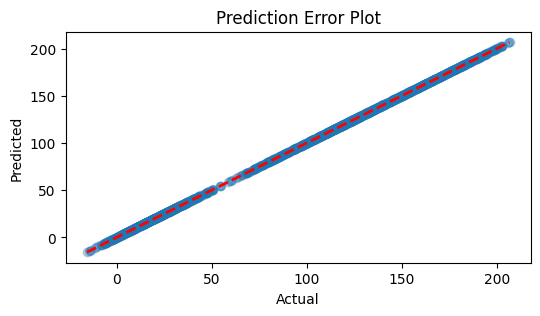

In [ ]:
X = np.random.rand(100, 1) * 100
y = X * 2 + np.random.normal(0, 10, size=(100, 1)).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
plt.figure(figsize=(6, 3))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error Plot')
plt.show()

Random data is generated to test a linear regression model, which is then trained on a subset and tested on the remaining data. After training, the model is used to predict new values and compare them to actual values. The resulting plot displays these predictions against the actual values; the red dashed line represents the ideal relationship, and the scatter of points around it illustrates the model's accuracy.

<b><font size="6:" color='#5097A4'>4. Optimization and hyperparameters Tuning:</font></b>



In [ ]:
X = df.drop('close', axis=1)
y = df['close']
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
X_sample = X.sample(frac=0.05, random_state=42)
y_sample = y.loc[X_sample.index]
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])
param_grid = {
    'regressor__n_estimators': [10, 50],
    'regressor__max_depth': [None, 10],
    'regressor__min_samples_split': [4],
    'regressor__min_samples_leaf': [2]
}
random_search = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=3,
    cv=2,
    verbose=2,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    error_score='raise'
)
try:
    random_search.fit(X_train, y_train)
    print("Best parameters found:", random_search.best_params_)
    print("Best score:", -random_search.best_score_)
    y_pred = random_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Test Mean Squared Error:", mse)
except Exception as e:
    print("Error during model fitting:", e)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best parameters found: {'regressor__n_estimators': 10, 'regressor__min_samples_split': 4, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': None}
Best score: 383.4294299249812
Test Mean Squared Error: 86.2244199411078


The code employs RandomizedSearchCV for hyperparameter tuning to optimize the RandomForestRegressor by adjusting key parameters like the number of trees (n_estimators), tree depth (max_depth), and minimum samples per node and leaf. This approach efficiently identifies the optimal model settings to minimize prediction errors.

The best result obtained was 383.43, which serves as an indicator of good model performance during the optimization process using RandomizedSearchCV. This is measured using the negative mean squared error, meaning that the lower the score, the better the model's performance.

In testing the model on new data, the mean squared error was 86.22. This low error rate indicates that the model made highly accurate predictions compared to the actual data, demonstrating the model's effectiveness in handling data it had not seen during training.